# Problem Statement

### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Data Science Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### Evaluation Metric
We will be using AUC - Probability to discriminate between subscriber and non-subscriber.

### Objective of this template notebook

The main objective of this template is to take you through the entire working pipeline that you may follow while appraoching a Machine Learning problem.

We will be defining a task to be performed and write the code to solve the task.

__The tasks performed below should serve as a good guide regarding the steps that you should go about a Machine Learning Problem. But kindly do not restrict yourself to only the tasks that have been performed in this notebook and feel free to bring your ideas,skills and strategies and implement them as well.__


### Word of caution

This template is just an example of a data-science pipeline, every data science problem is unique and there are multiple ways to tackle them. Go through this template and try to leverage the information in this while solving your hackathon problems but you may not be able to use all the functions created here.

# Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets:
`train.csv` with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

`test.csv` which is the test data that consists  of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorical,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y | binary| has the client subscribed a term deposit? ('yes','no')|

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data Modelling Libraries

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Data Loading and Cleaning




### Load the Preprocessed dataset

- In this task, we'll load the dataframe in pandas, drop the unnecessary columns and display the top five rows of the dataset.

In [3]:
# accessing to the folder where the file is stored
path = '../data/preprocessed_data.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()



Shape of the data is:  (32950, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


## Applying vanilla models on the data

Since we have performed preprocessing on our data and also done with the EDA part, it is now time to apply vanilla machine learning models on the data and check their performance.

### Fit vanilla classification models

Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms. 

There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-
- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier

The code we have written below internally splits the data into training data and validation data. It then fits the classification model on the train data and then makes a prediction on the validation data and outputs the scores for this prediction.

#### PREPARING THE TRAIN AND TEST DATA


In [4]:
# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)


#### FITTING THE MODEL AND PREDICTING THE VALUES

In [5]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)



#### GETTING THE METRICS TO CHECK OUR MODEL PERFORMANCE

ROC_AUC_SCORE is 0.5767972062815112


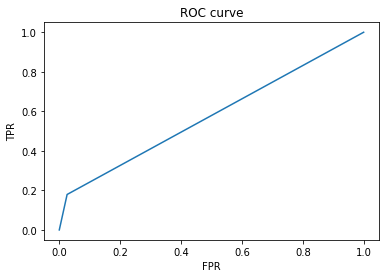

In [6]:

# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### The above two steps are combined and run in a single cell for all the remaining models respectively

ROC_AUC_SCORE is 0.6951552433615213


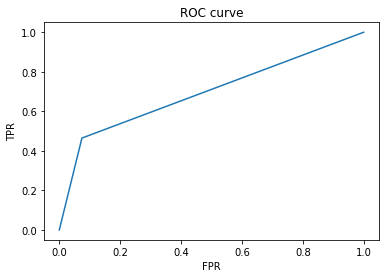

In [7]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6602720896442871


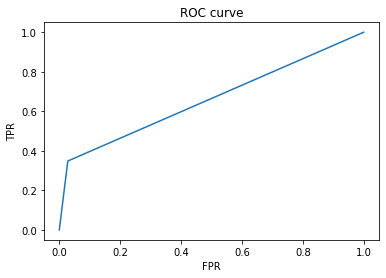

In [9]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### Observations :

We can test the features obtained from both the feature selection techniques by inserting these features to the model and depending on which set of features perform better, we can retain them for the model. 

__The Feature Selection techniques can differ from problem to problem and the techniques applied for this problem may or may not work for the other problems. In those cases, feel free to try out other methods like PCA, SelectKBest(), SelectPercentile(), tSNE etc.__

# Grid-Search & Hyperparameter Tuning 

Hyperparameters are function attributes that we have to specify for an algorithm. By now, you should be knowing that grid search is done to find out the best set of hyperparameters for your model.  

### Grid Search for Random Forest

In the below task, we write a code that performs hyperparameter tuning for a random forest classifier. We have used the hyperparameters `max_features`, `max_depth` and `criterion` for this task. Feel free to play around with this function by introducing a few more hyperparameters and chaniging their values

In [10]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}


### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

__Kindly note that SMOTE should always be applied only on the training data and not on the validation and test data.__

You can try experimenting with and without SMOTE and check for the difference in recall. 

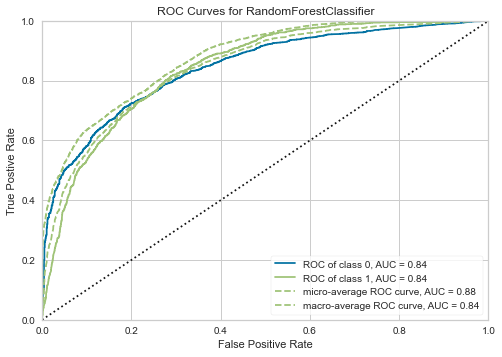

In [11]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    #print(classification_report(y_val, y_pred))
    #print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)

### Applying the grid search function for random forest only on the best features obtained using Random Forest

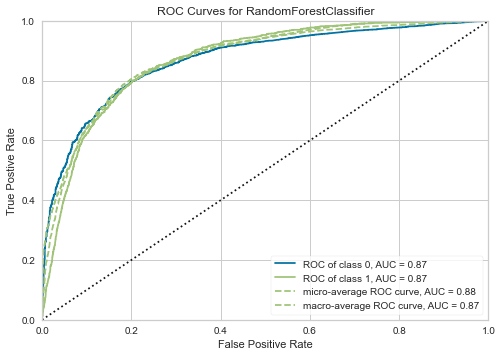

In [12]:
grid_search_random_forrest_best(X[['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']],y)

## Prediction on the test data

In the below task, we have performed a prediction on the test data. We have used Logistic Regression for this prediction. You can use the model of your choice that will give you the best metric score on the validation data. 

In this task below, we will read the test file and store the `Id` column from the test file in a variable `Id`. This column would be of use to us while submission since we need to have an Id column in the submission file which is the same Id of the observations in the test data.

We have to perform the same preprocessing operations on the test data that we have performed on the train data. For demonstration purposes, we have preprocessed the test data and this preprocessed data is present in the csv file `test_preprocessed.csv`

We then make a prediction on the preprocessed test data using the Grid Search Logisitic regression model. And as the final step, we concatenate this prediction with the `Id` column and then convert this into a csv file which becomes the `submission.csv` 

In [34]:
# Preprocessed Test File
test = pd.read_csv('../data/new_test.csv')
test.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [36]:
smote = SMOTE()

X_sm, y_sm =  smote.fit_sample(x_train, y_train)


rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)

# fitting the model
grid_search_model.fit(X_sm, y_sm)
    
# Predict on the preprocessed test file
y_pred = grid_search.predict(test)
    
#prediction = pd.DataFrame(y_pred,columns=['y'])
#submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('../data/submission.csv',index=False)